<a href="https://colab.research.google.com/github/pasosa-s/architecture_styles/blob/master/arch_styles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

Uninstalling torch-1.5.1+cu101:
  Successfully uninstalled torch-1.5.1+cu101
Uninstalling torchvision-0.6.1+cu101:
  Successfully uninstalled torchvision-0.6.1+cu101
     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 36.5MB/s 


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!ls

drive  sample_data


In [13]:
folder = 'gothic'
file = 'urls_gothic.csv'

In [15]:
folder = 'renaissance'
file = 'urls_renaissance.csv'

In [18]:
folder = 'baroque'
file = 'urls_baroque.csv'

In [19]:
path = Path('/content/drive/My Drive/Colab Notebooks/arch_styles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
classes = ['gothic', 'renaissance', 'baroque']

In [20]:
download_images(path/file, dest, max_pics=200)

In [21]:
len(classes)

3

In [22]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

gothic


renaissance


baroque


In [59]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [24]:
data.classes

['baroque', 'gothic', 'renaissance']

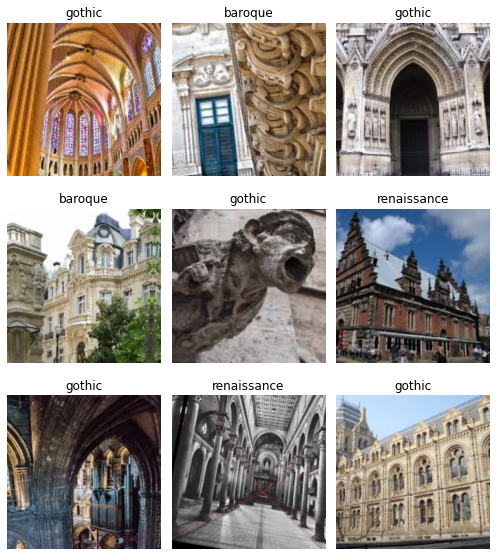

In [49]:
data.show_batch(rows=3, figsize=(7, 8))

In [50]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baroque', 'gothic', 'renaissance'], 3, 400, 99)

In [60]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [52]:
learn.model;

In [61]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.792121,0.969703,0.404040,00:07
1,1.384756,0.754190,0.242424,00:07
2,1.080059,0.764192,0.212121,00:07
3,0.898013,0.784006,0.202020,00:07
4,0.804923,0.793037,0.191919,00:07


In [62]:
learn.save('stage-1')

In [77]:
interp = ClassificationInterpretation.from_learner(learn)

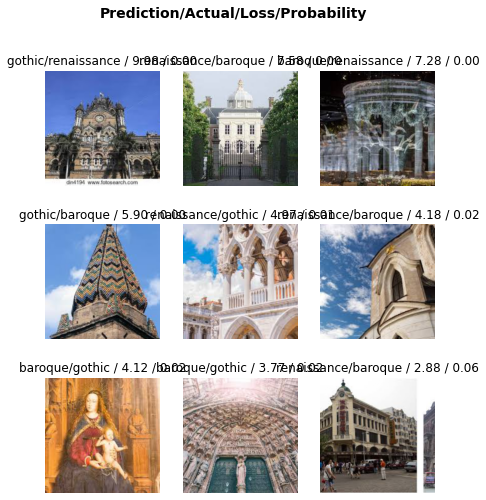

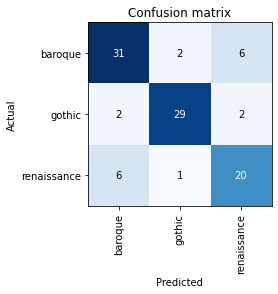

In [78]:
interp.plot_top_losses(9, figsize=(7, 8))
interp.plot_confusion_matrix()